In [93]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy.fftpack as fpack
plt.style.use('prl')

In [66]:
filename = "data/run_B_output.h5"
df = h5py.File(filename,"r")
p = df['tasks/p'][:]
q = df['tasks/q'][:]
t = df['scales/t'][:]

et = df['energies/e_tot'][:]
e1 = df['energies/e_1'][:]
e2 = df['energies/e_2'][:]
e1m = df['energies/e_1_emode'][:]
e2m = df['energies/e_2_emode'][:]
df.close()

In [20]:
ko = 0.5
ke = 1
N = 32
H = utils.linear_operator(N, k1=ko, k2=ke)
omega, evecs = utils.efreq(H)


In [81]:
def emode_vs_t(p, q, t, evecs, omega):
    p_hat = np.zeros_like(p[:,1:-1])
    q_hat = np.zeros_like(q[:,1:-1])
    for i in range(p.shape[0]):
        p_hat[i,:], q_hat[i,:] = utils.eigenmode_transform(p[i,1:-1],q[i,1:-1],evecs)
        #p_hat[i,:] /= np.cos(omega*t[i])*np.cos(omega*t[i])
        q_hat[i,:] /= np.cos(omega*t[i])
        
    return p_hat, q_hat

In [104]:
phat, qhat = emode_vs_t(p,q,t,evecs, omega)

q_dst = fpack.dst(q[:,1:-1],type=1)

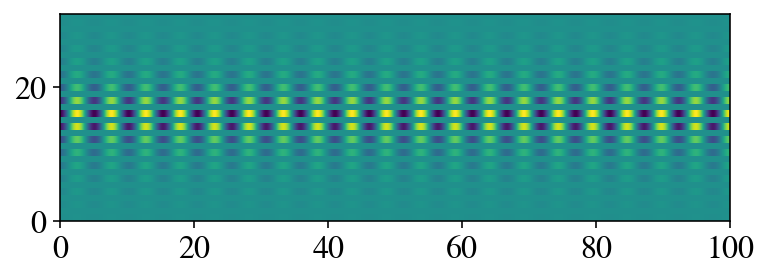

In [106]:
plt.imshow(q_dst.T,extent=(0,100,0,31),interpolation='none')

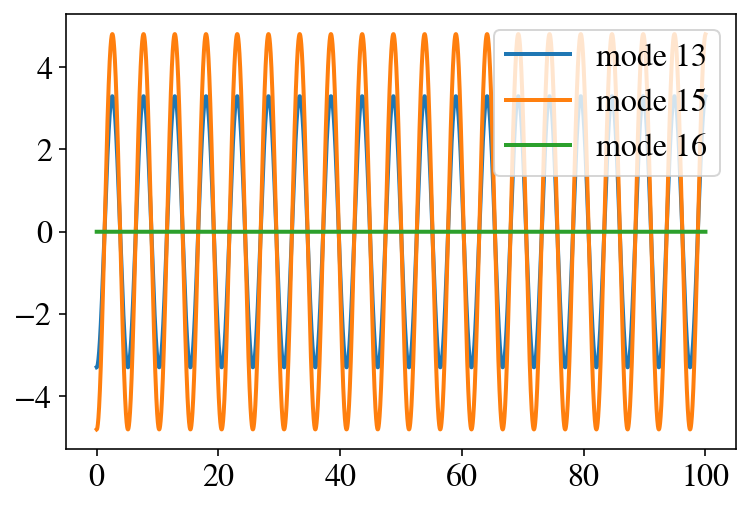

In [110]:
plt.plot(t, q_dst[:,13],label='mode 13')
plt.plot(t, q_dst[:,15],label='mode 15')
plt.plot(t,q_dst[:,16], label='mode 16')
plt.legend()

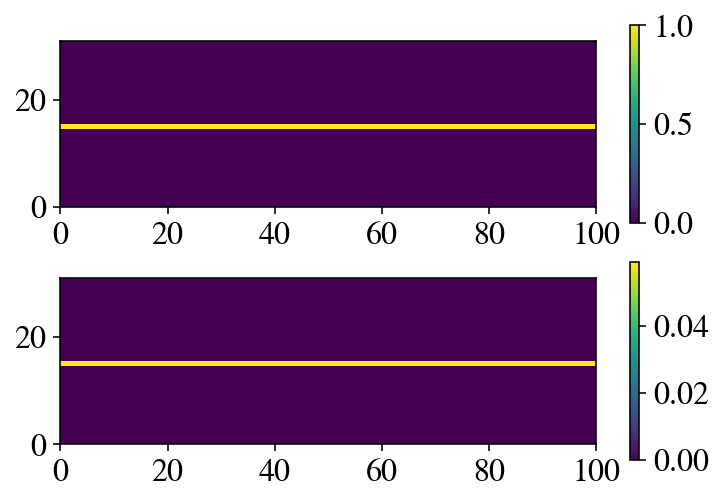

In [92]:
plt.subplot(211)
plt.imshow(qhat.T,extent=(0,100,0,31),origin='lower',interpolation='none')
plt.colorbar()
plt.subplot(212)
plt.imshow(np.abs(phat.T),extent=(0,100,0,31),origin='lower',interpolation='none')
plt.colorbar()

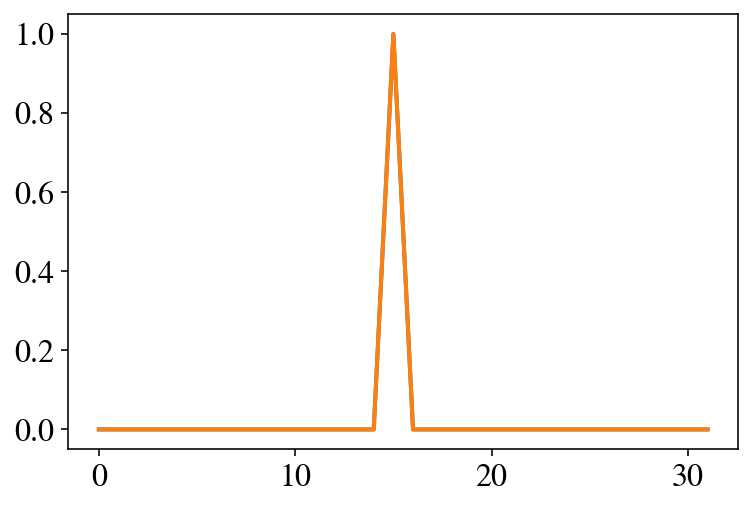

In [42]:
plt.plot(qhat[0,:]*qhat[0,:])
plt.plot(qhat[-100,:]*qhat[-100,:])

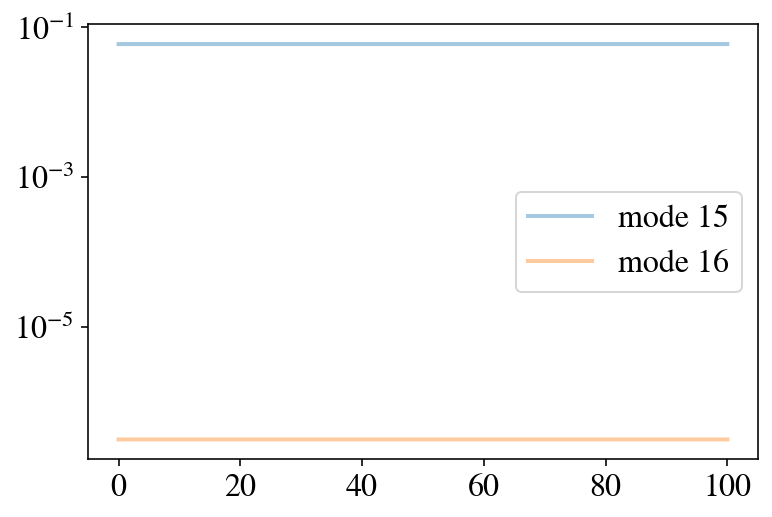

In [90]:
for i in range(phat.shape[1]):
    e_p = np.abs(phat[:,i])
    if np.abs(e_p.max())> 1e-7:
        plt.semilogy(t,e_p,alpha=0.4, label='mode {}'.format(i))
plt.legend()

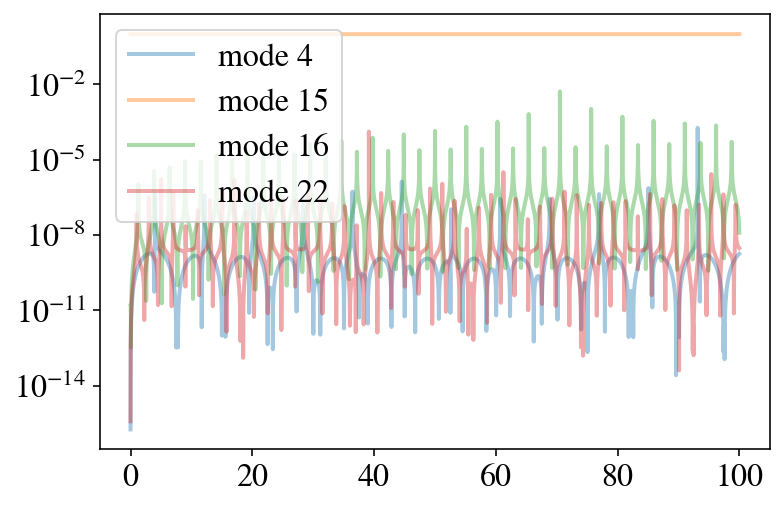

In [88]:
for i in range(qhat.shape[1]):
    e_q = np.abs(qhat[:,i])
    if np.abs(e_q.max())> 1e-4:
        plt.semilogy(t,e_q,alpha=0.4, label='mode {}'.format(i))
plt.legend()

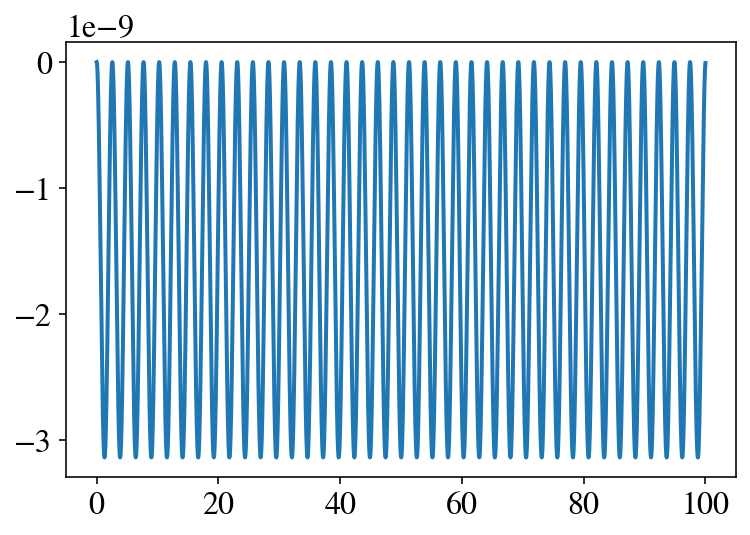

In [70]:
plt.plot(t,et-et[0])

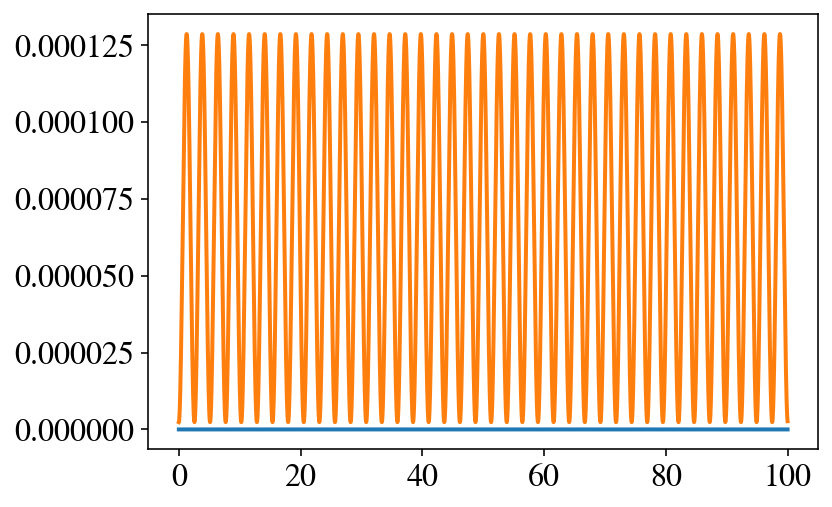

In [26]:
plt.plot(t, e1)
plt.plot(t, e2)
#plt.plot(t,e1m)
#plt.plot(t,e2m)

Text(0, 0.5, '$\\omega$')

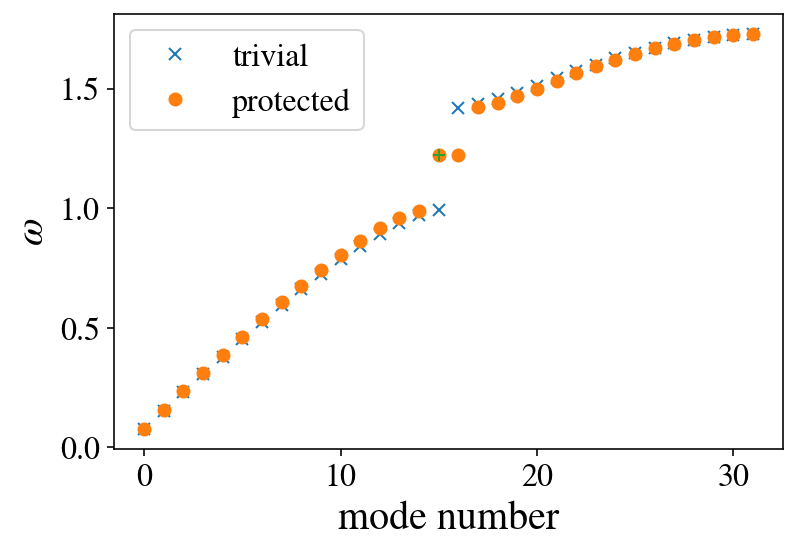

In [23]:
vals,vecs = utils.efreq(utils.linear_operator(32,k1=1,k2=0.5))
vals2,vecs2 = utils.efreq(utils.linear_operator(32,k1=0.5,k2=1))

plt.plot(vals,'x', label='trivial')
plt.plot(vals2,'o', label='protected')
plt.plot(15,vals2[15],'+')
plt.legend()
plt.xlabel("mode number")
plt.ylabel(r"$\omega$")

## Inner product for Orthogonality of modes

In [12]:
def ip(m, n):
    return (m*n).sum()

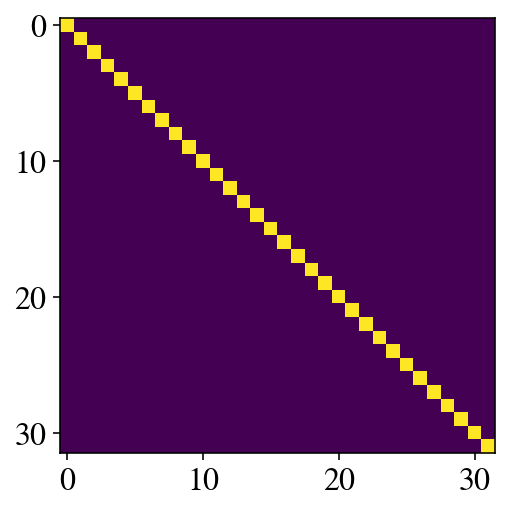

In [13]:
inner = np.zeros((32,32))
for m in range(32):
    for n in range(32):
        inner[m,n] = ip(vecs2[:,m],vecs2[:,n])
plt.imshow(inner)

In [14]:
inner

array([[ 1.00000000e+00,  1.54737334e-15, -4.71411105e-16, ...,
        -4.33680869e-17, -5.47955778e-16, -4.44089210e-16],
       [ 1.54737334e-15,  1.00000000e+00, -2.75821033e-15, ...,
        -3.49546780e-16, -2.35922393e-16, -1.95590072e-16],
       [-4.71411105e-16, -2.75821033e-15,  1.00000000e+00, ...,
         9.71445147e-17, -6.07153217e-18,  2.38524478e-16],
       ...,
       [-4.33680869e-17, -3.49546780e-16,  9.71445147e-17, ...,
         1.00000000e+00, -1.56610835e-14, -5.13651621e-15],
       [-5.47955778e-16, -2.35922393e-16, -6.07153217e-18, ...,
        -1.56610835e-14,  1.00000000e+00, -4.93528829e-16],
       [-4.44089210e-16, -1.95590072e-16,  2.38524478e-16, ...,
        -5.13651621e-15, -4.93528829e-16,  1.00000000e+00]])

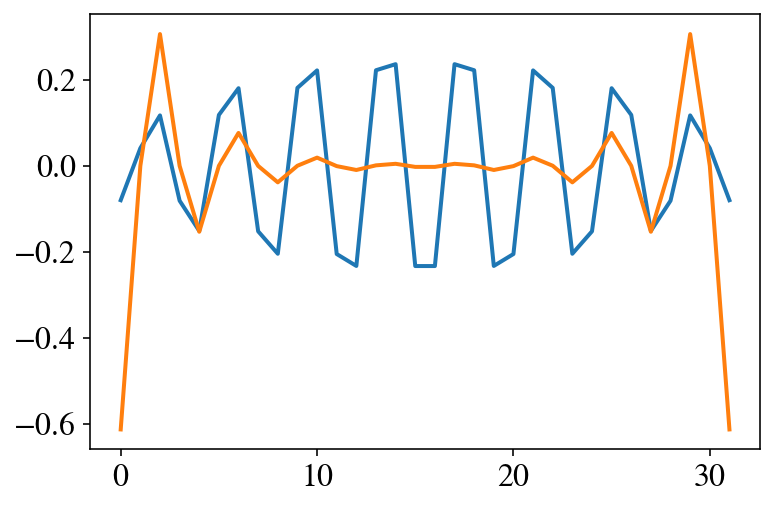

In [15]:
plt.plot(vecs[:,16])
plt.plot()
plt.plot(vecs2[:,16])

In [16]:
x = np.linspace(0,33,1000,endpoint=True)

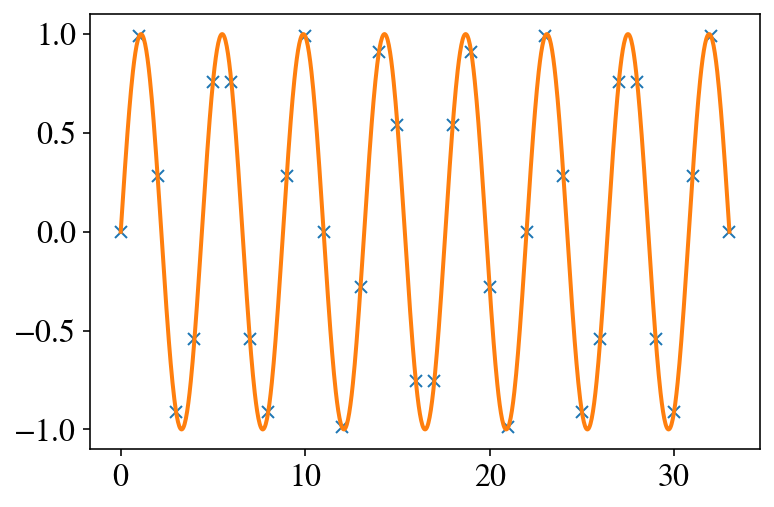

In [17]:
plt.plot(q[0,:],'x')
plt.plot(x,np.sin(15*np.pi/33*x))
#plt.plot(q[1000,:])
#plt.plot(q[2000,:])
#plt.plot(q[3000,:])

In [35]:
plt.imshow(q[:,1:-1].T/np.expand_dims(np.cos(omega*t),axis=0),extent=(0,100,0,31),origin='lower')
plt.xlabel("time")
plt.ylabel("Mass number")
plt.tight_layout()

ValueError: operands could not be broadcast together with shapes (32,) (10001,) 

In [32]:
q[:,1:-1].shape

(10001, 32)

In [36]:
np.expand_dims(np.cos(omega*t),axis=0).shape

ValueError: operands could not be broadcast together with shapes (32,) (10001,) 

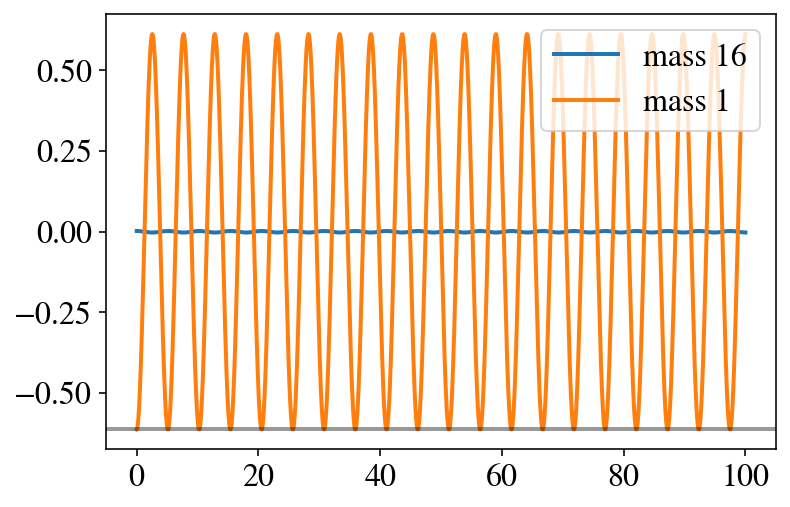

In [30]:
plt.plot(t,q[:,16], label='mass 16')
plt.plot(t,q[:,1], label='mass 1')
plt.axhline(q[0,1],color='k', alpha=0.4)
plt.legend()

In [ ]:
def project(p,q,mode):
    